<a href="https://colab.research.google.com/github/Datajacker/Introduction-to-data-science/blob/master/Copy_of_ATB_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split 

In [ ]:
atb = pd.read_csv('T9_BUS_PTNR_TRXN (1).csv')

In [ ]:
atb.head()

,BUS_PTNR_OID,DATE,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_CHQ,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_CHQ,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS
0,129670,30APR2016,1,0,4,0,3,0,0,0,1,0,0,2,0,4,0,0,2,1,4,0.0,891.99,0,506.14,0.0,0.0,0.0,435.42,0.0,0.00,91.99,0.0,287.27,0.0,0.0,25.0,435.42,176.69
1,129670,31MAY2016,1,0,2,0,3,0,0,0,1,0,0,1,0,4,0,0,2,1,1,0.0,253.00,0,506.14,0.0,0.0,0.0,435.42,0.0,0.00,140.00,0.0,287.27,0.0,0.0,50.0,435.42,34.57
2,129670,30JUN2016,1,1,2,0,3,0,0,0,1,0,3,1,0,4,0,0,1,1,8,200.0,520.00,0,506.14,0.0,0.0,0.0,435.42,0.0,304.25,120.00,0.0,287.27,0.0,0.0,100.0,435.42,288.99
3,129670,31JUL2016,1,1,1,0,3,0,0,0,1,0,8,0,0,4,0,0,2,1,9,200.0,700.00,0,507.21,0.0,0.0,0.0,435.42,0.0,356.25,0.00,0.0,287.27,0.0,0.0,130.0,435.42,177.77
4,129670,31AUG2016,1,1,2,0,3,0,0,0,1,0,6,1,0,4,0,0,1,1,4,100.0,952.57,0,507.21,0.0,0.0,0.0,435.42,0.0,291.25,6.45,0.0,287.27,0.0,0.0,100.0,435.42,99.77


In [ ]:
atb.describe()

,BUS_PTNR_OID,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_CHQ,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_CHQ,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS
count,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1266792.0,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1266792.0,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06,1.266792e+06
mean,1.447601e+06,1.061656e+00,2.417263e-01,2.449550e-01,0.0,1.144344e+00,1.102259e+00,5.212947e-01,1.347727e-01,1.413395e+00,1.056499e+00,1.264045e+00,2.456402e-01,9.083733e-02,1.863390e+00,1.990810e+00,1.486151e+00,1.683062e-01,1.095437e+00,1.295163e+01,1.548207e+02,7.928185e+02,0.0,1.575782e+03,6.144714e+02,4.553550e+02,1.819366e+02,6.191961e+02,4.919560e+01,1.404727e+02,5.043447e+02,1.149919e+02,4.732299e+02,8.004595e+02,8.521328e+02,2.700085e+02,3.562784e+02,5.396762e+02
std,6.379550e+05,4.054500e-01,9.545516e-01,8.467700e-01,0.0,2.305794e+00,3.190795e+00,1.963693e+00,1.312425e+00,2.009466e+00,6.090716e+00,3.746616e+00,1.072487e+00,5.864203e-01,3.731990e+00,5.184590e+00,4.079001e+00,9.318262e-01,2.019541e+00,2.632854e+01,1.168457e+03,1.232660e+04,0.0,4.384988e+03,3.379303e+03,4.528302e+03,5.155210e+03,3.699283e+03,3.073941e+02,5.604599e+02,7.376612e+03,3.217965e+03,1.835451e+03,3.433955e+03,5.486301e+03,9.084444e+03,1.447147e+03,1.208749e+03
min,1.296700e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.371900e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.717403e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.210000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.987863e+06,1.000000e+00,0.000000e+00,0.000000e+00,0.0,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.0,1.914370e+03,0.000000e+00,0.000000e+00,0.000000e+00,7.022400e+02,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,4.023300e+02,7.500000e+01,0.000000e+00,0.000000e+00,2.729200e+02,5.284725e+02
max,2.323888e+06,5.000000e+00,6.600000e+01,4.000000e+01,0.0,1.360000e+02,2.190000e+02,9.800000e+01,7.570000e+02,8.700000e+01,1.920000e+02,2.670000e+02,4.700000e+01,6.400000e+01,2.200000e+02,4.720000e+02,1.210000e+02,8.300000e+01,8.500000e+01,4.1300

In [ ]:
atb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266792 entries, 0 to 1266791
Data columns (total 39 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   BUS_PTNR_OID  1266792 non-null  int64  
 1   DATE          1266792 non-null  object 
 2   STATUS        1266792 non-null  int64  
 3   N_CR_ABM      1266792 non-null  int64  
 4   N_CR_BRCH     1266792 non-null  int64  
 5   N_CR_CHQ      1266792 non-null  int64  
 6   N_CR_EFT      1266792 non-null  int64  
 7   N_CR_MOBILE   1266792 non-null  int64  
 8   N_CR_ONLINE   1266792 non-null  int64  
 9   N_CR_OTHER    1266792 non-null  int64  
 10  N_CR_PE       1266792 non-null  int64  
 11  N_CR_POS      1266792 non-null  int64  
 12  N_DB_ABM      1266792 non-null  int64  
 13  N_DB_BRCH     1266792 non-null  int64  
 14  N_DB_CHQ      1266792 non-null  int64  
 15  N_DB_EFT      1266792 non-null  int64  
 16  N_DB_MOBILE   1266792 non-null  int64  
 17  N_DB_ONLINE   1266792 non-n

In [ ]:
atb.tail()

,BUS_PTNR_OID,DATE,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_CHQ,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_CHQ,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS
1266787,2323888,31OCT2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.00,0.0,0.0,0.0,0.0
1266788,2323888,30NOV2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1266789,2323888,31DEC2018,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0,0.0,948.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,948.57,0.0,0.0,0.0,0.0
1266790,2323888,31JAN2019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1266791,2323888,28FEB2019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [ ]:
df_atb = atb.copy()

In [ ]:
df_atb = df_atb.drop(columns= ['V_CR_CHQ', 'N_CR_CHQ'])

In [ ]:
df_atb.head()

,BUS_PTNR_OID,DATE,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS
0,129670,30APR2016,1,0,4,3,0,0,0,1,0,0,2,0,4,0,0,2,1,4,0.0,891.99,506.14,0.0,0.0,0.0,435.42,0.0,0.00,91.99,0.0,287.27,0.0,0.0,25.0,435.42,176.69
1,129670,31MAY2016,1,0,2,3,0,0,0,1,0,0,1,0,4,0,0,2,1,1,0.0,253.00,506.14,0.0,0.0,0.0,435.42,0.0,0.00,140.00,0.0,287.27,0.0,0.0,50.0,435.42,34.57
2,129670,30JUN2016,1,1,2,3,0,0,0,1,0,3,1,0,4,0,0,1,1,8,200.0,520.00,506.14,0.0,0.0,0.0,435.42,0.0,304.25,120.00,0.0,287.27,0.0,0.0,100.0,435.42,288.99
3,129670,31JUL2016,1,1,1,3,0,0,0,1,0,8,0,0,4,0,0,2,1,9,200.0,700.00,507.21,0.0,0.0,0.0,435.42,0.0,356.25,0.00,0.0,287.27,0.0,0.0,130.0,435.42,177.77
4,129670,31AUG2016,1,1,2,3,0,0,0,1,0,6,1,0,4,0,0,1,1,4,100.0,952.57,507.21,0.0,0.0,0.0,435.42,0.0,291.25,6.45,0.0,287.27,0.0,0.0,100.0,435.42,99.77


In [ ]:
customer = df_atb.copy()

In [ ]:
customer.head()

,BUS_PTNR_OID,DATE,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS
0,129670,30APR2016,1,0,4,3,0,0,0,1,0,0,2,0,4,0,0,2,1,4,0.0,891.99,506.14,0.0,0.0,0.0,435.42,0.0,0.00,91.99,0.0,287.27,0.0,0.0,25.0,435.42,176.69
1,129670,31MAY2016,1,0,2,3,0,0,0,1,0,0,1,0,4,0,0,2,1,1,0.0,253.00,506.14,0.0,0.0,0.0,435.42,0.0,0.00,140.00,0.0,287.27,0.0,0.0,50.0,435.42,34.57
2,129670,30JUN2016,1,1,2,3,0,0,0,1,0,3,1,0,4,0,0,1,1,8,200.0,520.00,506.14,0.0,0.0,0.0,435.42,0.0,304.25,120.00,0.0,287.27,0.0,0.0,100.0,435.42,288.99
3,129670,31JUL2016,1,1,1,3,0,0,0,1,0,8,0,0,4,0,0,2,1,9,200.0,700.00,507.21,0.0,0.0,0.0,435.42,0.0,356.25,0.00,0.0,287.27,0.0,0.0,130.0,435.42,177.77
4,129670,31AUG2016,1,1,2,3,0,0,0,1,0,6,1,0,4,0,0,1,1,4,100.0,952.57,507.21,0.0,0.0,0.0,435.42,0.0,291.25,6.45,0.0,287.27,0.0,0.0,100.0,435.42,99.77


In [ ]:
customer['DATE'] = pd.to_datetime(customer['DATE'], format='%d%b%Y')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266792 entries, 0 to 1266791
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   BUS_PTNR_OID  1266792 non-null  int64         
 1   DATE          1266792 non-null  datetime64[ns]
 2   STATUS        1266792 non-null  int64         
 3   N_CR_ABM      1266792 non-null  int64         
 4   N_CR_BRCH     1266792 non-null  int64         
 5   N_CR_EFT      1266792 non-null  int64         
 6   N_CR_MOBILE   1266792 non-null  int64         
 7   N_CR_ONLINE   1266792 non-null  int64         
 8   N_CR_OTHER    1266792 non-null  int64         
 9   N_CR_PE       1266792 non-null  int64         
 10  N_CR_POS      1266792 non-null  int64         
 11  N_DB_ABM      1266792 non-null  int64         
 12  N_DB_BRCH     1266792 non-null  int64         
 13  N_DB_CHQ      1266792 non-null  int64         
 14  N_DB_EFT      1266792 non-null  int64         
 15

In [ ]:
customer['DATE'] = pd.to_datetime(customer['DATE'], '%d%b%Y')

In [ ]:
customer.head()

,BUS_PTNR_OID,DATE,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS
0,129670,2016-04-30,1,0,4,3,0,0,0,1,0,0,2,0,4,0,0,2,1,4,0.0,891.99,506.14,0.0,0.0,0.0,435.42,0.0,0.00,91.99,0.0,287.27,0.0,0.0,25.0,435.42,176.69
1,129670,2016-05-31,1,0,2,3,0,0,0,1,0,0,1,0,4,0,0,2,1,1,0.0,253.00,506.14,0.0,0.0,0.0,435.42,0.0,0.00,140.00,0.0,287.27,0.0,0.0,50.0,435.42,34.57
2,129670,2016-06-30,1,1,2,3,0,0,0,1,0,3,1,0,4,0,0,1,1,8,200.0,520.00,506.14,0.0,0.0,0.0,435.42,0.0,304.25,120.00,0.0,287.27,0.0,0.0,100.0,435.42,288.99
3,129670,2016-07-31,1,1,1,3,0,0,0,1,0,8,0,0,4,0,0,2,1,9,200.0,700.00,507.21,0.0,0.0,0.0,435.42,0.0,356.25,0.00,0.0,287.27,0.0,0.0,130.0,435.42,177.77
4,129670,2016-08-31,1,1,2,3,0,0,0,1,0,6,1,0,4,0,0,1,1,4,100.0,952.57,507.21,0.0,0.0,0.0,435.42,0.0,291.25,6.45,0.0,287.27,0.0,0.0,100.0,435.42,99.77


In [ ]:
customer.STATUS.value_counts()


1    1227777
2      20011
5       8303
3       7221
4       3480
Name: STATUS, dtype: int64

In [ ]:
pert = pd.DataFrame(customer.STATUS.value_counts())
pert.reset_index(inplace= True)
pert

,index,STATUS
0,1,1227777
1,2,20011
2,5,8303
3,3,7221
4,4,3480


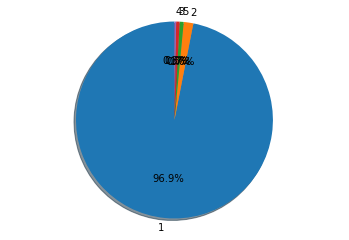

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(pert['STATUS'], labels=pert['index'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
date = pd.DataFrame(customer.DATE.value_counts())
date.reset_index(inplace = True)
date.columns = ['DATE', 'COUNT']
date = date.sort_values('DATE')
date.reset_index(inplace= True)
date.drop('index', axis=1)
date

,index,DATE,COUNT
0,34,2016-04-30,31048
1,33,2016-05-31,31864
2,32,2016-06-30,32774
3,31,2016-07-31,33626
4,30,2016-08-31,34393
5,29,2016-09-30,35086
6,24,2016-10-31,35682
7,20,2016-11-30,36278
8,16,2016-12-31,36691
9,12,2017-01-31,37100


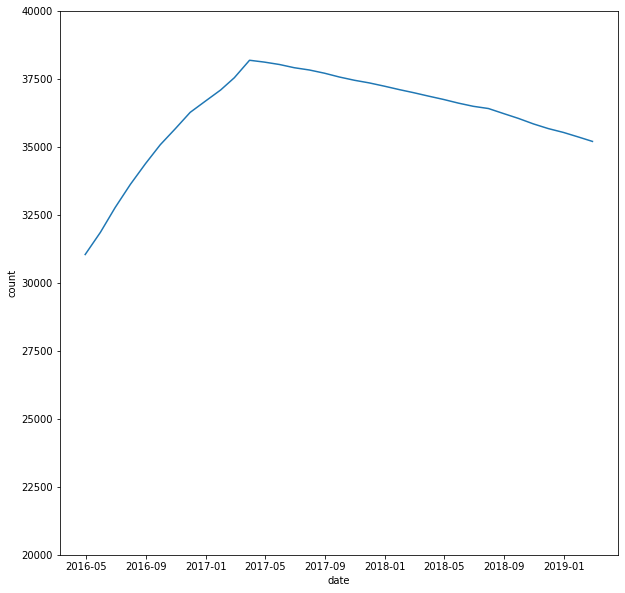

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(date.DATE, date.COUNT)
plt.xlabel('date')
plt.ylabel('count')
plt.ylim(20000, 40000)
plt.show()

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266792 entries, 0 to 1266791
Data columns (total 37 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   BUS_PTNR_OID  1266792 non-null  int64         
 1   DATE          1266792 non-null  datetime64[ns]
 2   STATUS        1266792 non-null  int64         
 3   N_CR_ABM      1266792 non-null  int64         
 4   N_CR_BRCH     1266792 non-null  int64         
 5   N_CR_EFT      1266792 non-null  int64         
 6   N_CR_MOBILE   1266792 non-null  int64         
 7   N_CR_ONLINE   1266792 non-null  int64         
 8   N_CR_OTHER    1266792 non-null  int64         
 9   N_CR_PE       1266792 non-null  int64         
 10  N_CR_POS      1266792 non-null  int64         
 11  N_DB_ABM      1266792 non-null  int64         
 12  N_DB_BRCH     1266792 non-null  int64         
 13  N_DB_CHQ      1266792 non-null  int64         
 14  N_DB_EFT      1266792 non-null  int64         
 15

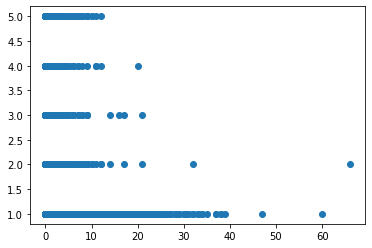

In [ ]:
plt.scatter(customer['N_CR_ABM'],customer['STATUS'])

In [ ]:
paras = list(customer.columns)
paras.remove('BUS_PTNR_OID')
paras.remove('DATE')
paras.remove('STATUS')
paras

['N_CR_ABM',
 'N_CR_BRCH',
 'N_CR_EFT',
 'N_CR_MOBILE',
 'N_CR_ONLINE',
 'N_CR_OTHER',
 'N_CR_PE',
 'N_CR_POS',
 'N_DB_ABM',
 'N_DB_BRCH',
 'N_DB_CHQ',
 'N_DB_EFT',
 'N_DB_MOBILE',
 'N_DB_ONLINE',
 'N_DB_OTHER',
 'N_DB_PE',
 'N_DB_POS',
 'V_CR_ABM',
 'V_CR_BRCH',
 'V_CR_EFT',
 'V_CR_MOBILE',
 'V_CR_ONLINE',
 'V_CR_OTHER',
 'V_CR_PE',
 'V_CR_POS',
 'V_DB_ABM',
 'V_DB_BRCH',
 'V_DB_CHQ',
 'V_DB_EFT',
 'V_DB_MOBILE',
 'V_DB_ONLINE',
 'V_DB_OTHER',
 'V_DB_PE',
 'V_DB_POS']

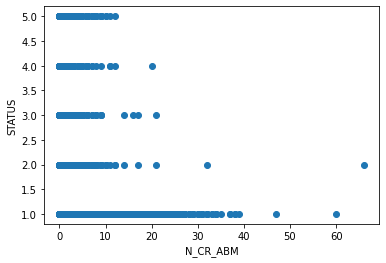

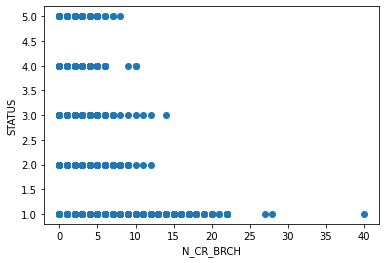

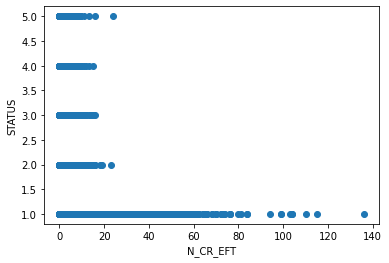

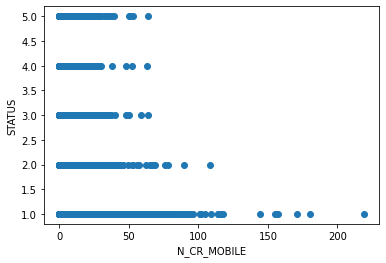

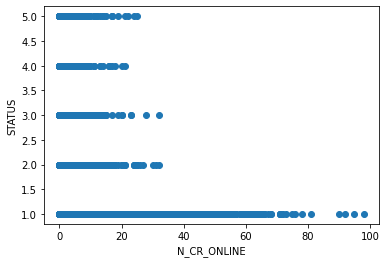

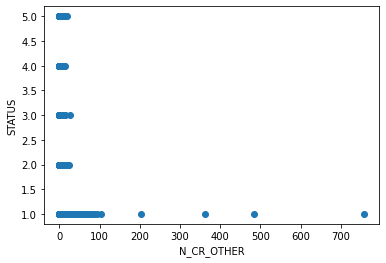

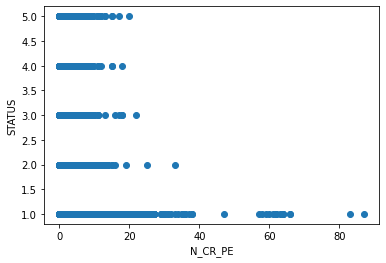

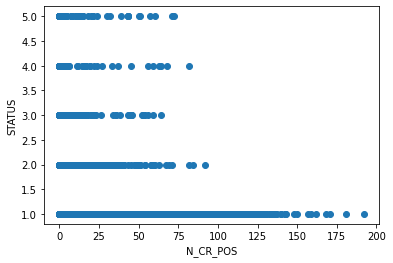

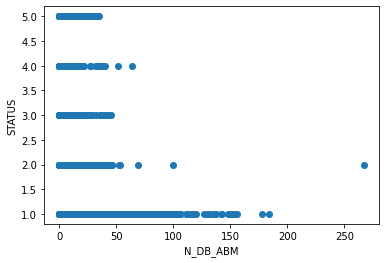

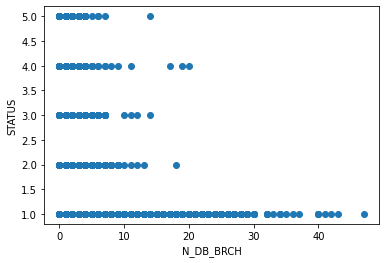

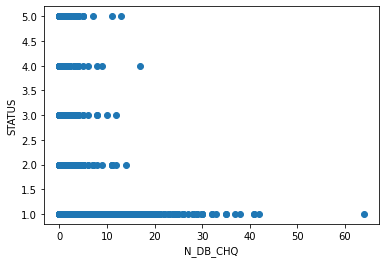

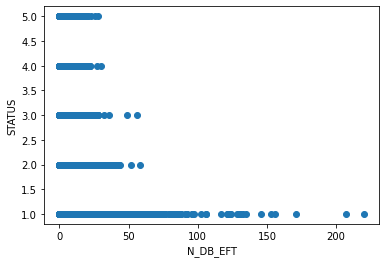

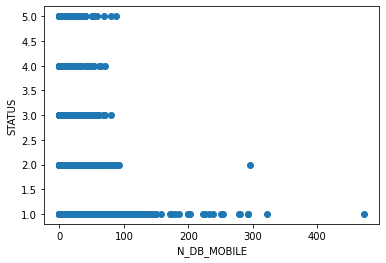

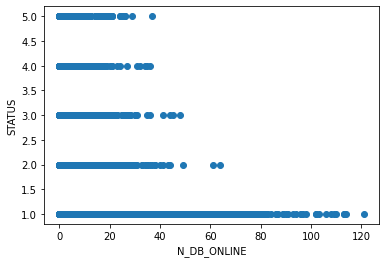

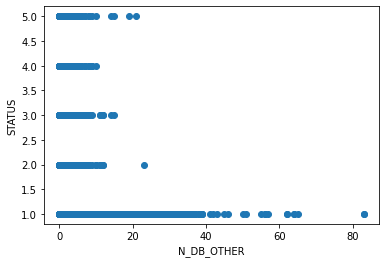

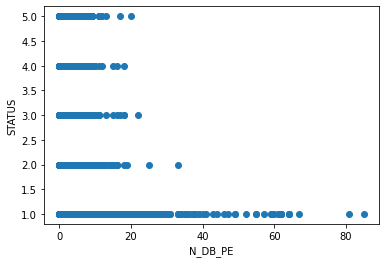

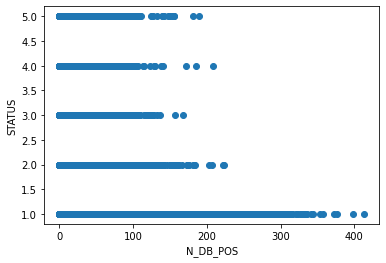

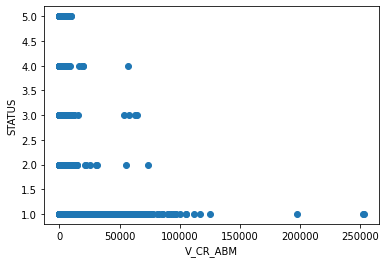

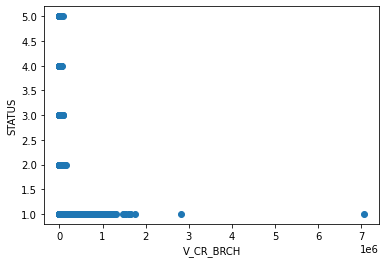

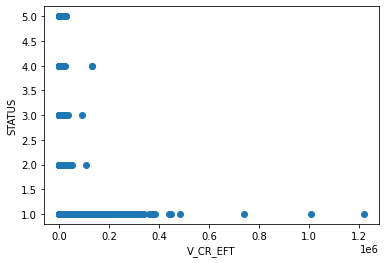

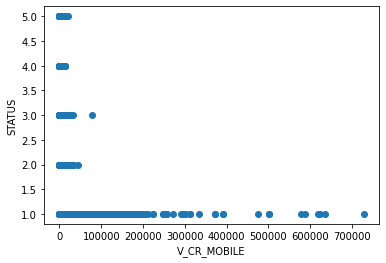

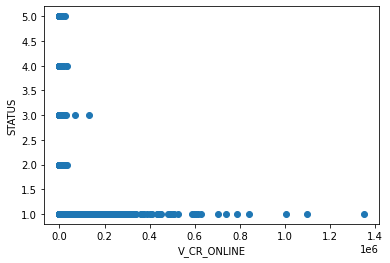

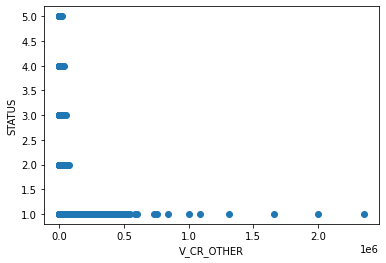

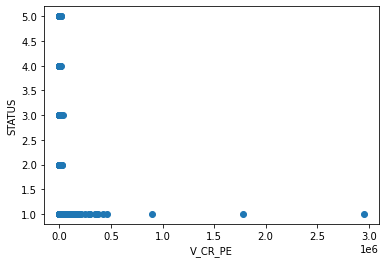

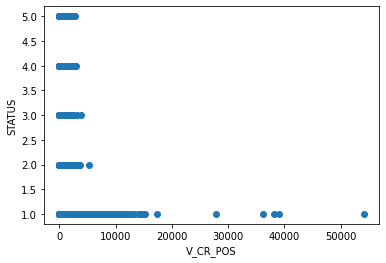

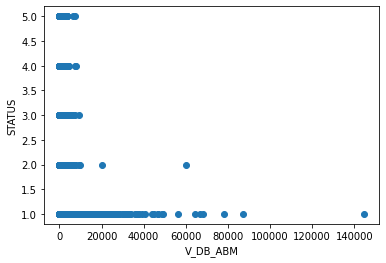

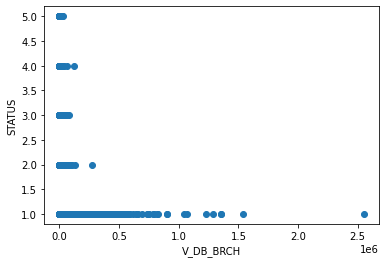

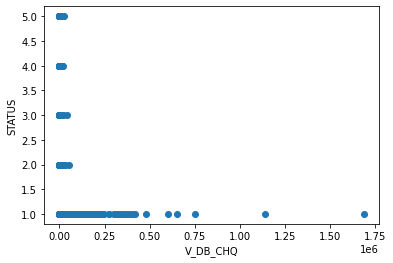

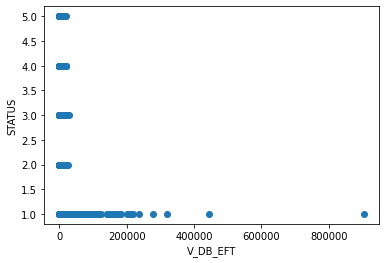

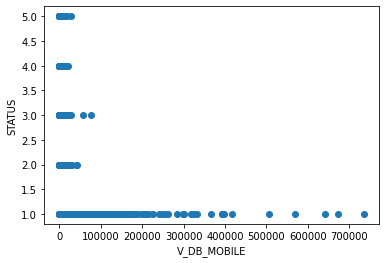

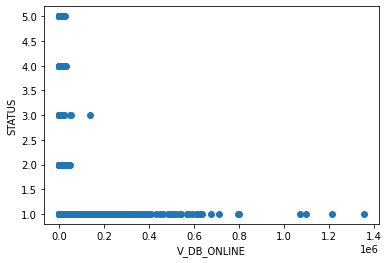

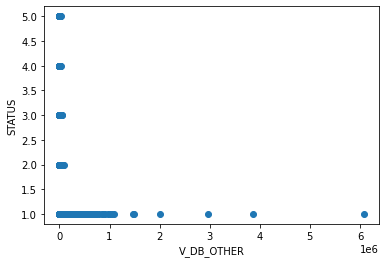

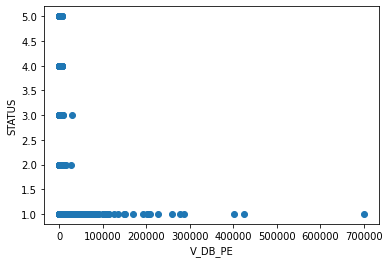

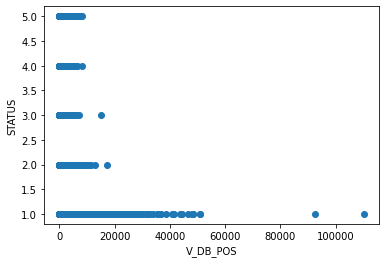

In [ ]:
for para in paras:
  plt.figure()
  plt.scatter(customer[para],customer['STATUS'])
  plt.xlabel(para)
  plt.ylabel('STATUS')
  plt.show()


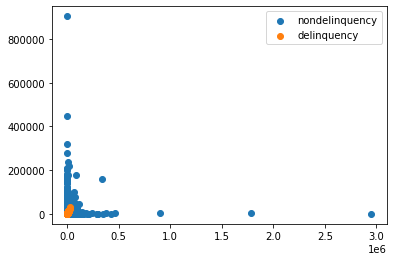

In [ ]:
delinquency = customer[customer.STATUS != 1]
nondelinquency = customer[customer.STATUS == 1]
plt.figure()
plt.scatter(nondelinquency['V_CR_PE'], nondelinquency['V_DB_EFT'], label = 'nondelinquency')
plt.scatter(delinquency['V_CR_PE'], delinquency['V_CR_PE'], label = 'delinquency')
plt.legend()
plt.show()

In [ ]:
delinquency_2 = customer[customer.STATUS == 2]
delinquency_3 = customer[customer.STATUS == 3]
delinquency_4 = customer[customer.STATUS == 4]
delinquency_5 = customer[customer.STATUS == 5]

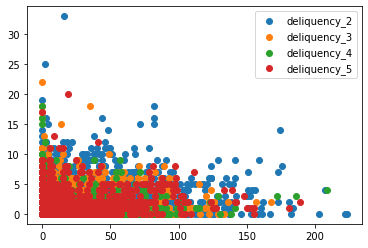

In [ ]:
plt.figure()
plt.scatter(delinquency_2['N_DB_POS'], delinquency_2['N_DB_PE'], label = 'deliquency_2')
plt.scatter(delinquency_3['N_DB_POS'], delinquency_3['N_DB_PE'], label = 'deliquency_3')
plt.scatter(delinquency_4['N_DB_POS'], delinquency_4['N_DB_PE'], label = 'deliquency_4')
plt.scatter(delinquency_5['N_DB_POS'], delinquency_5['N_DB_PE'], label = 'deliquency_5')
plt.legend()
plt.show()

In [ ]:
ids = delinquency_5.BUS_PTNR_OID.unique()

In [ ]:
print(customer.head())
customer['Status_lagged'] = customer.groupby(["BUS_PTNR_OID"])['STATUS'].shift(1)
print(customer.head())

   BUS_PTNR_OID       DATE  STATUS  ...  V_DB_OTHER  V_DB_PE  V_DB_POS
0        129670 2016-04-30       1  ...        25.0   435.42    176.69
1        129670 2016-05-31       1  ...        50.0   435.42     34.57
2        129670 2016-06-30       1  ...       100.0   435.42    288.99
3        129670 2016-07-31       1  ...       130.0   435.42    177.77
4        129670 2016-08-31       1  ...       100.0   435.42     99.77

[5 rows x 37 columns]
   BUS_PTNR_OID       DATE  STATUS  ...  V_DB_PE  V_DB_POS  Status_lagged
0        129670 2016-04-30       1  ...   435.42    176.69            NaN
1        129670 2016-05-31       1  ...   435.42     34.57            1.0
2        129670 2016-06-30       1  ...   435.42    288.99            1.0
3        129670 2016-07-31       1  ...   435.42    177.77            1.0
4        129670 2016-08-31       1  ...   435.42     99.77            1.0

[5 rows x 38 columns]


In [ ]:
customer_lagged= customer.copy().dropna()
customer["Status_lagged"].replace({1: 0, 2: 1, 3:1 , 4:1 , 5:1}, inplace=True)
customer_lagged.tail()

,BUS_PTNR_OID,DATE,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS,Status_lagged
1266787,2323888,2018-10-31,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.00,0.0,0.0,0.0,0.0,1.0
1266788,2323888,2018-11-30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
1266789,2323888,2018-12-31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,948.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,948.57,0.0,0.0,0.0,0.0,1.0
1266790,2323888,2019-01-31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
1266791,2323888,2019-02-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0


In [ ]:
customer_lagged = customer_lagged.set_index('DATE')

In [ ]:
print(customer_lagged.head())

            BUS_PTNR_OID  STATUS  N_CR_ABM  ...  V_DB_PE  V_DB_POS  Status_lagged
DATE                                        ...                                  
2016-05-31        129670       1         0  ...   435.42     34.57            1.0
2016-06-30        129670       1         1  ...   435.42    288.99            1.0
2016-07-31        129670       1         1  ...   435.42    177.77            1.0
2016-08-31        129670       1         1  ...   435.42     99.77            1.0
2016-09-30        129670       1         0  ...   435.42      0.00            1.0

[5 rows x 37 columns]


In [ ]:
customer_lagged.Status_lagged.value_counts()

1.0    1187879
2.0      19305
5.0       7919
3.0       6989
4.0       3374
Name: Status_lagged, dtype: int64

In [ ]:
#put the date as index so we can split the data
training_data = customer_lagged['2016-01-01':'2018-02-01']
training_data.head()

,BUS_PTNR_OID,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS,Status_lagged
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-31,129670,1,0,2,3,0,0,0,1,0,0,1,0,4,0,0,2,1,1,0.0,253.00,506.14,0.0,0.0,0.0,435.42,0.0,0.00,140.00,0.0,287.27,0.0,0.0,50.0,435.42,34.57,1.0
2016-06-30,129670,1,1,2,3,0,0,0,1,0,3,1,0,4,0,0,1,1,8,200.0,520.00,506.14,0.0,0.0,0.0,435.42,0.0,304.25,120.00,0.0,287.27,0.0,0.0,100.0,435.42,288.99,1.0
2016-07-31,129670,1,1,1,3,0,0,0,1,0,8,0,0,4,0,0,2,1,9,200.0,700.00,507.21,0.0,0.0,0.0,435.42,0.0,356.25,0.00,0.0,287.27,0.0,0.0,130.0,435.42,177.77,1.0
2016-08-31,129670,1,1,2,3,0,0,0,1,0,6,1,0,4,0,0,1,1,4,100.0,952.57,507.21,0.0,0.0,0.0,435.42,0.0,291.25,6.45,0.0,287.27,0.0,0.0,100.0,435.42,99.77,1.0
2016-09-30,129670,1,0,4,3,0,0,0,1,0,8,0,0,4,0,0,3,1,0,0.0,1700.00,507.21,0.0,0.0,0.0,435.42,0.0,515.00,0.00,0.0,287.27,0.0,0.0,230.0,435.42,0.00,1.0


In [ ]:
#create a year worth of training data
status = "Status_lagged"
status = training_data.loc[:,status]

features = list(training_data.columns[2:-1])
features = training_data.loc[:, features]

#create a year worth of test data
test_data = customer_lagged

status_test = "Status_lagged"
status_test = training_data.loc[:,status_test]

features_test = list(training_data.columns[2:-1])
features_test = training_data.loc[:, features_test]

[0.00904809 0.01289508 0.01583803 0.02199401 0.01257526 0.02933503
 0.03059097 0.00545497 0.01494647 0.00894876 0.00303714 0.05863087
 0.0190014  0.01424485 0.01217795 0.02580686 0.0230455  0.01184488
 0.01830006 0.01629192 0.02727614 0.01323526 0.03399344 0.32282533
 0.00538613 0.0157634  0.01021585 0.00282133 0.09124599 0.02024722
 0.01309439 0.01627022 0.04069412 0.02292309]


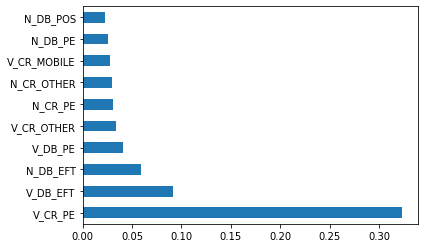

In [ ]:
data = training_data

status = "Status_lagged"
status = data.loc[:,status]

features = list(data.columns[2:-1])
features = data.loc[:, features]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features,status)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
training_data_feature = training_data[['N_DB_POS', 'N_DB_PE', 'V_CR_MOBILE','N_CR_PE','N_CR_OTHER','V_CR_OTHER','V_DB_PE','N_DB_EFT','V_DB_EFT','V_CR_PE','Status_lagged']]

In [ ]:
training_data_feature.head(10)

,N_DB_POS,N_DB_PE,V_CR_MOBILE,N_CR_PE,N_CR_OTHER,V_CR_OTHER,V_DB_PE,N_DB_EFT,V_DB_EFT,V_CR_PE,Status_lagged
DATE,,,,,,,,,,,
2016-05-31,1,1,0.0,1,0,0.0,435.42,4,287.27,435.42,1.0
2016-06-30,8,1,0.0,1,0,0.0,435.42,4,287.27,435.42,1.0
2016-07-31,9,1,0.0,1,0,0.0,435.42,4,287.27,435.42,1.0
2016-08-31,4,1,0.0,1,0,0.0,435.42,4,287.27,435.42,1.0
2016-09-30,0,1,0.0,1,0,0.0,435.42,4,287.27,435.42,1.0
2016-10-31,9,1,0.0,1,0,0.0,435.42,4,305.06,435.42,1.0
2016-11-30,8,1,0.0,1,0,0.0,435.42,4,305.06,435.42,1.0
2016-12-31,2,1,0.0,1,0,0.0,435.42,4,305.06,435.42,1.0
2017-01-31,0,1,0.0,1,0,0.0,435.42,4,305.06,435.42,1.0


In [ ]:
#To start we will treat this as a binary problem.  The customer either defaulted or didn't. 
training_data_feature["Status_lagged"].replace({1: 0, 2: 1, 3:1 , 4:1 , 5:1}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
#Split the data into the training data/test data and the status and features
scaled_data = training_data_feature

status_train = "Status_lagged"
status_train = scaled_data.loc[:,status_train]

features_train = list(scaled_data.columns[0:-1])
features_train = scaled_data.loc[:, features_train]

test_data = customer_lagged['2018-02-02':'2019-02-02']
test_data_feature = test_data[['N_DB_POS', 'N_DB_PE', 'V_CR_MOBILE','N_CR_PE','N_CR_OTHER','V_CR_OTHER','V_DB_PE','N_DB_EFT','V_DB_EFT','V_CR_PE','Status_lagged']]
test_data_feature["Status_lagged"].replace({1: 0, 2: 1, 3:1 , 4:1 , 5:1}, inplace=True)

status_test = "Status_lagged"
status_test = test_data_feature.loc[:,status_test]

features_test = list(test_data_feature.columns[0:-1])
features_test = test_data_feature.loc[:, features_test]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, max_depth = 2)
classifier.fit(features_train,status_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#predictions to evaluate
y_pred = classifier.predict_proba(features_test)

#Since the initial data was skewed having roughly <1% of rows being default the data needed to be further tweaked to leverage the model
#to better "predict" when a customer might default.  Below if the probability of the prediction was greater than 0.15 we considered that
#to be a non-default.  This will be a place to further investigate to improve the model as if >0.5 is used the model will predict every row
#is a non-default and not be very useful.
convert_y_pred = pd.Series(y_pred[:,1]).apply(lambda x: 1 if x > 0.14 else 0)

cm = confusion_matrix(status_test,convert_y_pred)
print(cm)

[[418495   2438]
 [ 12311    904]]


0.06840711312902005
0.2704967085577499


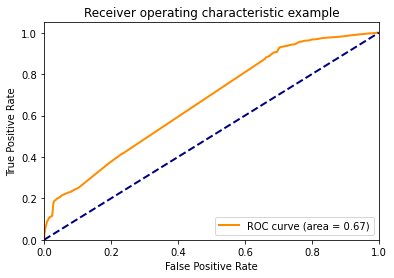

In [ ]:
#Utilizing the ROC Curve to analyze the performance of the model
def display_roc_curve(total_labels, total_probs):
    """
    args:
        total_labels - list of true labels
        total_probs - correspond list of probability predictions for samples
                      aka output of predict_proba
    """
    total_probs = np.array(total_probs)
    fpr, tpr, thresholds = roc_curve(total_labels, total_probs[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

print(recall_score(status_test,convert_y_pred))
print(precision_score(status_test,convert_y_pred))

display_roc_curve(status_test,y_pred)

In [ ]:
#Explore clustering the data set by choosing a month to reduce data set.  Chose Unique 'BUS_PTNR_OID' to see if there are a common clustering features.
clustering_data = customer_lagged[customer_lagged.index.month == 2].drop_duplicates(subset = ['BUS_PTNR_OID'])
clustering_data.describe()

,BUS_PTNR_OID,STATUS,N_CR_ABM,N_CR_BRCH,N_CR_EFT,N_CR_MOBILE,N_CR_ONLINE,N_CR_OTHER,N_CR_PE,N_CR_POS,N_DB_ABM,N_DB_BRCH,N_DB_CHQ,N_DB_EFT,N_DB_MOBILE,N_DB_ONLINE,N_DB_OTHER,N_DB_PE,N_DB_POS,V_CR_ABM,V_CR_BRCH,V_CR_EFT,V_CR_MOBILE,V_CR_ONLINE,V_CR_OTHER,V_CR_PE,V_CR_POS,V_DB_ABM,V_DB_BRCH,V_DB_CHQ,V_DB_EFT,V_DB_MOBILE,V_DB_ONLINE,V_DB_OTHER,V_DB_PE,V_DB_POS,Status_lagged
count,3.998300e+04,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000,39983.000000
mean,1.464647e+06,1.063227,0.217542,0.230373,1.026486,0.865768,0.528825,0.060801,1.330215,0.898432,1.153765,0.222720,0.117100,1.691319,1.558187,1.491159,0.102168,1.028837,11.051647,134.360619,600.453091,1413.253726,455.096981,439.881523,155.033348,545.146121,39.566989,125.175856,370.789353,139.412594,423.159723,586.226790,815.200002,198.432190,331.918640,442.199025,1.065103
std,6.419797e+05,0.413317,0.866102,0.769768,2.019668,2.561438,1.904441,0.443924,1.806335,5.299123,3.378425,0.978787,0.600338,3.320470,4.187075,3.877993,0.561100,1.830041,22.210136,1039.503093,6378.660475,3537.196794,2195.894774,3577.954495,3237.355080,1197.163952,273.115495,473.820953,5968.590279,2298.114336,1213.697982,2357.138745,4578.925816,3118.286665,1058.492287,979.241859,0.424287
min,1.296700e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.478195e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.748045e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.005838e+06,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,1763.150000,0.000000,0.000000,0.000000,646.765000,0.000000,0.000000,0.000000,0.000000,359.590000,0.000000,0.000000,0.000000,252.605000,459.745000,1.000000
max,2.323888e+06,5.000000,31.000000,12.000000,59.000000,79.000000,60.000000,22.000000,30.000000,157.000000,120.000000,25.000000,19.000000,83.000000,100.000000,80.000000,23.000000,29.000000,330.000000,82900.350000,574611.100000,152310.280000,128635.000000,332695.000000,399976.000000,41591.740000,27882.750000,30242.690000,821629.850000,229930.190000,78545.670000,141420.200000,400406.280000,350000.000000,104484.830000,35829.610000,5.000000


In [ ]:
#Split Data into features for clustering via K-Means Clustering
X_features = clustering_data.iloc[:,2:-2]

In [ ]:
print(clustering_data['Status_lagged'])

DATE
2017-02-28    1.0
2017-02-28    1.0
2017-02-28    1.0
2017-02-28    1.0
2017-02-28    1.0
             ... 
2018-02-28    1.0
2018-02-28    1.0
2018-02-28    1.0
2019-02-28    1.0
2018-02-28    1.0
Name: Status_lagged, Length: 39983, dtype: float64


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5'])
print(principalDf)

       principal component 1  ...  principal component 5
0                -845.992924  ...             453.704974
1                -489.815479  ...            -995.067973
2                 311.646138  ...            -560.113144
3                -634.041957  ...           -1715.813524
4                1028.180839  ...            -283.838454
...                      ...  ...                    ...
39978           -1262.265030  ...             650.918713
39979           -1269.744879  ...             674.294767
39980            1565.990225  ...             256.690061
39981            -602.633642  ...           -1565.430842
39982           -1026.154589  ...             645.817019

[39983 rows x 5 columns]


In [ ]:
from sklearn.cluster import KMeans
#Train the KMeans on the data set
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=4)
y_kmeans = kmeans.fit_predict(principalDf)

In [ ]:
clustering_data['cluster_id'] = y_kmeans

clustering_data['cluster_id'].loc[clustering_data['cluster_id'] == 4].size

5

In [ ]:
principalDf= principalDf.reset_index()
clustering_data = clustering_data.reset_index()
principalDf['Status_lagged'] = clustering_data['Status_lagged']
principalDf.head()

,index,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Status_lagged
0,0,-845.992924,790.994529,475.968472,-720.843396,453.704974,1.0
1,1,-489.815479,-643.906754,-321.159456,1064.858407,-995.067973,1.0
2,2,311.646138,-1792.004437,-1155.384149,171.881864,-560.113144,1.0
3,3,-634.041957,-389.934871,-246.583974,2201.271599,-1715.813524,1.0
4,4,1028.180839,-3154.482213,-1960.930734,3208.883767,-283.838454,1.0


In [ ]:
print(clustering_data['Status_lagged'])

DATE
2017-02-28    1.0
2017-02-28    1.0
2017-02-28    1.0
2017-02-28    1.0
2017-02-28    1.0
             ... 
2018-02-28    1.0
2018-02-28    1.0
2018-02-28    1.0
2019-02-28    1.0
2018-02-28    1.0
Name: Status_lagged, Length: 39983, dtype: float64


In [ ]:
print(finalDf.head())

   principal component 1  ...  Status_lagged
0            -845.992924  ...            NaN
1            -489.815479  ...            NaN
2             311.646138  ...            NaN
3            -634.041957  ...            NaN
4            1028.180839  ...            NaN

[5 rows x 6 columns]


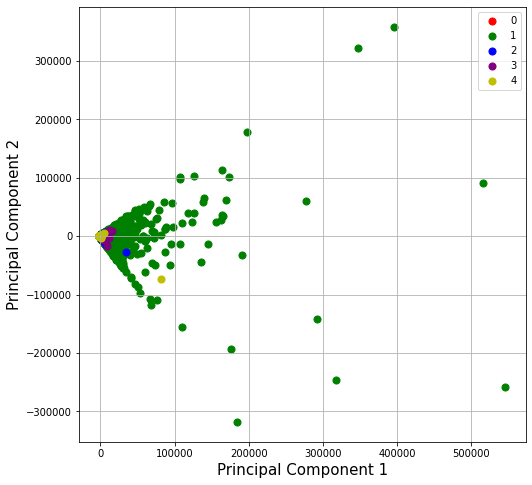

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3,4]
colors = ['r', 'g', 'b', 'purple', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Status_lagged'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()